# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_response = requests.get(btc_url).json()

btc_price = btc_response['data']['1']['quotes']['USD']['price']
print(f"The current price of Bitcoin is: ${btc_price}")

The current price of Bitcoin is: $34692.0


In [6]:
eth_response = requests.get(eth_url).json()

eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(eth_price)

2356.09


In [7]:
# Fetch current BTC price
# YOUR CODE HERE!
print(btc_price)


# Fetch current ETH price
# YOUR CODE HERE!
print(eth_price)
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

34692.0
2356.09
The current value of your 1.2 BTC is $41630.40
The current value of your 5.3 ETH is $12487.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


In [10]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
investments_df = alpaca.get_barset(tickers, timeframe, start=today, limit=1000).df

# Preview DataFrame
# YOUR CODE HERE!
investments_df.head()


AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538

In [11]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(investments_df['AGG']['close'][0])
spy_close_price = float(investments_df['SPY']['close'][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.9
Current SPY closing price: $282.73


In [12]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00


### Savings Health Analysis

In [13]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
savings_data = [my_btc_value + my_eth_value, my_spy_value + my_agg_value]

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,54117.677
shares,37516.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

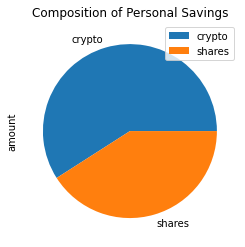

In [14]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')


In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())

# Validate saving health
# YOUR CODE HERE!

if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratiuations! You have reached this financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching this goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [26]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_stocks = MCSimulation(portfolio_data=df_stock_data, weights = [0.4, 0.6], num_simulation = 500, num_trading_days=252*30)

In [27]:
# Printing the simulation input data
# YOUR CODE HERE!
mc_stocks.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
#This is already done
mc_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jonat\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002750,1.000423,1.000932,1.013627,0.992759,1.007606,1.012087,1.006988,0.998616,0.997936,...,0.983354,0.993505,1.012567,0.997697,1.016932,1.000488,0.997214,0.985209,0.999267,1.004975
2,0.995162,1.003109,1.004938,1.019841,0.983714,1.001032,1.024484,1.012215,1.001548,0.999101,...,0.981183,0.983019,1.008821,0.995299,1.009325,1.018602,0.985242,0.985063,0.992119,1.010339
3,0.985451,1.012474,0.999900,1.024117,0.986809,0.982198,1.017693,1.007274,0.990002,1.015098,...,0.989452,0.964190,1.004766,1.005330,1.017661,1.014516,0.981287,0.977177,0.985927,1.010733
4,0.991294,1.014056,0.994782,1.016104,0.978037,0.978490,1.027266,0.998727,0.980290,1.013395,...,0.972966,0.958580,1.000843,0.997762,1.020961,1.015975,0.967219,0.969785,0.984456,1.017985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.264714,9.732052,14.727774,16.293253,5.990295,3.751774,30.925281,16.252899,27.885703,11.450529,...,26.864477,15.038345,11.699964,18.598757,10.796537,10.122979,4.468119,20.938349,2.846951,28.100146
7557,19.415068,9.637888,14.567296,16.556887,6.024918,3.724253,30.826248,16.066386,27.429838,11.399666,...,26.518624,15.009081,11.667558,18.535872,10.859597,10.094687,4.535128,20.966327,2.858618,28.351646
7558,19.226446,9.817512,14.668510,16.682107,6.074629,3.738059,30.869592,15.787602,27.654629,11.521695,...,26.603959,14.871171,11.611955,18.731106,10.900273,10.284406,4.576664,21.082388,2.833884,28.160788
7559,18.815660,9.913074,14.746143,16.618979,6.079758,3.736685,31.174884,15.509185,27.652980,11.651119,...,26.428520,14.869653,11.439210,18.491338,10.873786,10.321680,4.533418,21.061431,2.839452,28.267384


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

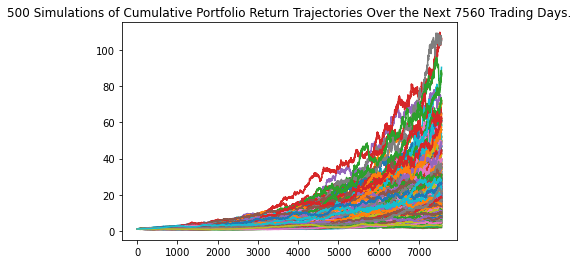

In [36]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_stocks.plot_simulation()

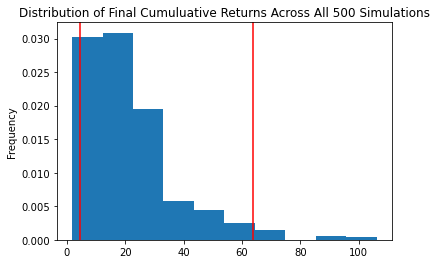

In [37]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ditribution_plot = mc_stocks.plot_distribution()

### Retirement Analysis

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
mc_statistics = mc_stocks.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(mc_statistics)

count           500.000000
mean             21.785829
std              15.831437
min               1.766613
25%              11.246422
50%              17.785887
75%              26.673740
max             106.074526
95% CI Lower      4.390059
95% CI Upper     63.616729
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
mc_20k_ci_lower = round(mc_statistics[8]*initial_investment,2)
mc_20k_ci_upper = round(mc_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mc_20k_ci_lower} and ${mc_20k_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87801.18 and $1272334.58


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
mc_20k_increase_ci_lower = round(mc_statistics[8]*initial_investment,2)
mc_20k_increase_ci_upper = round(mc_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mc_20k_increase_ci_lower} and ${mc_20k_increase_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131701.77 and $1908501.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_stocks_5yr = MCSimulation(portfolio_data=df_stock_data, weights = [0.4, 0.6], num_simulation = 500, num_trading_days=252*5)

In [45]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
mc_stocks_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jonat\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994387,1.001527,0.998819,0.995908,0.998168,1.005562,0.990678,0.970710,0.992579,1.001369,...,0.999223,0.993664,0.991285,0.995608,1.002048,0.989380,1.004349,1.005304,1.009183,1.005752
2,0.995440,0.990437,0.983188,0.997327,0.996406,1.001567,0.995785,0.970933,0.998556,0.997879,...,0.995431,1.014408,1.008313,0.994819,1.014829,1.000836,1.001473,0.994969,1.008341,1.011565
3,1.002273,0.987388,0.977843,0.997675,0.989549,0.989819,0.987927,0.977316,1.010931,0.994380,...,0.995915,1.008716,1.020336,0.984455,1.020572,1.001355,1.019550,1.003940,1.007156,1.018546
4,0.998380,0.986665,0.979618,1.008311,0.986079,0.995822,0.985743,0.972090,1.006058,1.004686,...,0.990095,1.007879,1.021091,0.997315,1.012046,1.013426,1.019665,1.007068,1.016357,0.997877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.700115,1.218658,1.458706,2.127617,1.630715,1.371141,1.294752,1.165925,1.674240,2.182497,...,1.909083,1.733610,2.600198,1.248230,1.723248,1.690660,1.240970,1.452144,1.126733,1.384080
1257,1.684102,1.221567,1.449690,2.124237,1.628707,1.369740,1.287174,1.149870,1.666540,2.163174,...,1.904915,1.742259,2.595936,1.240904,1.746403,1.697848,1.223446,1.471221,1.125485,1.380723
1258,1.691399,1.227729,1.443771,2.133569,1.630261,1.391033,1.292940,1.152393,1.680195,2.156353,...,1.892709,1.729058,2.607620,1.236106,1.761858,1.702124,1.236196,1.472688,1.134206,1.383419
1259,1.711707,1.239825,1.454331,2.119832,1.657096,1.392749,1.289585,1.138441,1.673970,2.152382,...,1.884954,1.706798,2.589329,1.235005,1.750872,1.706015,1.241272,1.470965,1.149297,1.361274


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

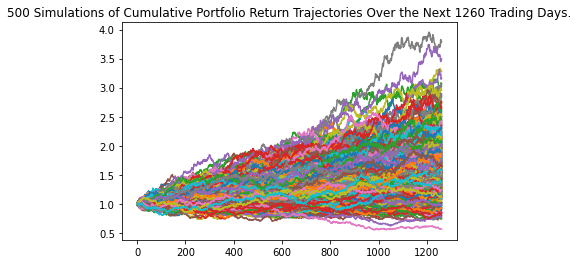

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_stocks_5yr.plot_simulation()

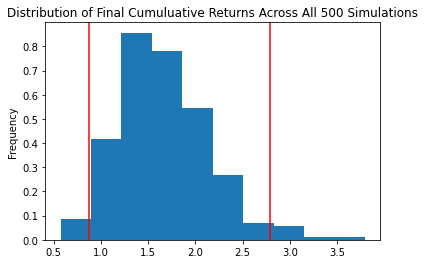

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ditribution_plot_5yr = mc_stocks_5yr.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
mc_statistics_5yr = mc_stocks_5yr.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(mc_statistics_5yr)

count           500.000000
mean              1.669619
std               0.478562
min               0.571347
25%               1.336446
50%               1.625569
75%               1.968969
max               3.793598
95% CI Lower      0.868400
95% CI Upper      2.792572
Name: 1260, dtype: float64


In [56]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_5yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
mc_60k_5yr_ci_lower = round(mc_statistics_5yr[8]*initial_investment_5yr,2)
mc_60k_5yr_ci_upper = round(mc_statistics_5yr[9]*initial_investment_5yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${mc_60k_5yr_ci_lower} and ${mc_60k_5yr_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $52103.99 and $167554.34


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_stocks_10yr = MCSimulation(portfolio_data=df_stock_data, weights = [0.4, 0.6], num_simulation = 500, num_trading_days=252*10)


In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
mc_stocks_10yr.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jonat\uofm-virt-fin-pt-12-2021-u-c\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995682,0.999341,1.010353,0.998131,1.008645,0.987237,1.008862,1.004340,1.015180,0.987286,...,1.015614,1.011615,0.984994,0.996593,1.012731,1.007776,1.011846,0.992829,0.997250,0.999929
2,1.002144,0.995991,0.998013,0.993724,1.011137,0.978542,1.015013,1.001854,1.020956,0.999674,...,1.004697,1.009835,0.976919,0.997977,1.012622,1.008820,1.012809,0.991165,0.996414,0.980504
3,1.006432,0.991455,1.008613,0.997922,1.010918,0.970713,1.023498,1.002509,1.008408,0.992211,...,1.017682,1.015990,0.977923,1.002811,1.016829,1.003361,1.009111,0.998787,0.994784,0.965469
4,1.013606,0.988948,1.003607,1.000476,1.015749,0.980203,1.034972,0.996860,0.992754,0.987802,...,1.043802,1.025354,0.986764,0.993164,1.016794,1.005366,1.014080,0.995847,0.985868,0.958206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.744174,1.786457,3.535638,1.644710,2.176564,2.144048,5.495923,1.478566,2.928651,2.016864,...,1.746102,2.900812,2.492297,3.049312,2.523557,2.334710,2.147005,2.372548,2.772455,3.608793
2517,1.734899,1.811245,3.497115,1.618789,2.213636,2.154018,5.593729,1.493274,2.919790,1.983030,...,1.764740,2.875152,2.485336,3.085465,2.483913,2.320027,2.132113,2.355992,2.805195,3.597627
2518,1.734240,1.817336,3.519940,1.596725,2.249114,2.174526,5.575678,1.506690,2.916887,1.976277,...,1.760538,2.865147,2.506182,3.057801,2.461920,2.288655,2.123295,2.334625,2.808284,3.643663
2519,1.742287,1.806800,3.553905,1.572002,2.248744,2.167454,5.599918,1.505060,2.931605,1.977410,...,1.760478,2.865798,2.517866,3.053794,2.439319,2.286058,2.127948,2.316967,2.823896,3.663075


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

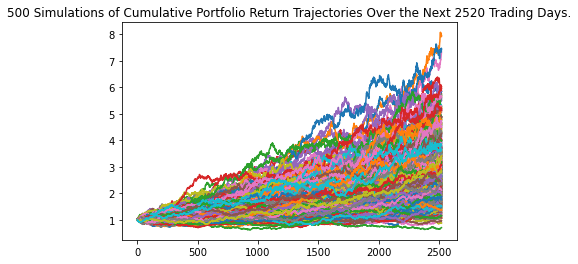

In [52]:
# Plot simulation outcomes
# YOUR CODE HERE!
mc_stocks_10yr.plot_simulation()

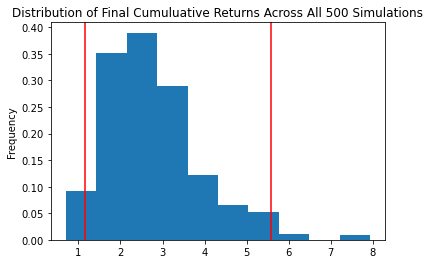

In [53]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
ditribution_plot_10yr = mc_stocks_10yr.plot_distribution()


In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
mc_statistics_10yr = mc_stocks_10yr.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(mc_statistics_10yr)


count           500.000000
mean              2.775632
std               1.123395
min               0.699585
25%               1.972770
50%               2.573980
75%               3.381969
max               7.934584
95% CI Lower      1.161448
95% CI Upper      5.575888
Name: 2520, dtype: float64


In [58]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_10yr = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
mc_60k_10yr_ci_lower = round(mc_statistics_10yr[8]*initial_investment_10yr,2)
mc_60k_10yr_ci_upper = round(mc_statistics_10yr[9]*initial_investment_10yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${mc_60k_10yr_ci_lower} and ${mc_60k_10yr_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $69686.87 and $334553.31
